In [1]:
import numpy as np

x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

Text(0,0.5,'Price')

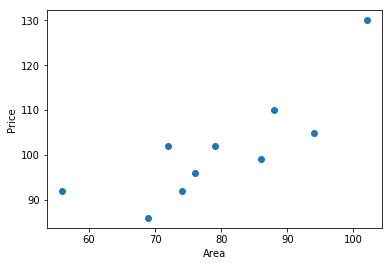

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(x, y)
plt.xlabel("Area")
plt.ylabel("Price")

In [3]:
def f(x, w0, w1):
    y = w0 + w1 * x
    return y

In [4]:
def square_loss(x, y, w0, w1):
    loss = sum(np.square(y - (w0 + w1*x)))
    return loss

In [5]:
def w_calculator(x, y):
    n = len(x)
    w1 = (n*sum(x*y) - sum(x)*sum(y))/(n*sum(x*x) - sum(x)*sum(x))
    w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y))/(n*sum(x*x)-sum(x)*sum(x))
    return w0, w1

In [6]:
w_calculator(x, y)

(41.33509168550616, 0.7545842753077117)

In [7]:
w0 = w_calculator(x, y)[0]
w1 = w_calculator(x, y)[1]
square_loss(x, y, w0, w1)

447.69153479025357

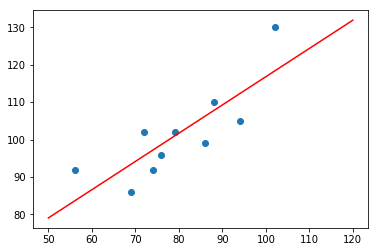

In [8]:
x_temp = np.linspace(50,120,100) # 绘制直线生成的临时点
plt.scatter(x, y)
plt.plot(x_temp, x_temp*w1 + w0, 'r')

In [9]:
f(150, w0, w1)

154.5227329816629

In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
# 定义线性回归模型
model = LinearRegression()
model.fit(x.reshape(len(x),1) , y) # 训练, reshape 操作把数据处理成 fit 能接受的形状
# 得到模型拟合参数
model.intercept_, model.coef_

(41.335091685506185, array([0.75458428]))

In [13]:
model.predict([[150]])

array([154.52273298])

In [14]:
def w_matrix(x, y):
    w = (x.T * x).I * x.T * y
    return w

In [15]:
x = np.matrix([[1,56],[1,72],[1,69],[1,88],[1,102],[1,86],[1,76],[1,79],[1,94],[1,74]])
y = np.matrix([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])
w_matrix(x, y.reshape(10,1))

matrix([[41.33509169],
        [ 0.75458428]])

In [17]:
import pandas as pd
df = pd.read_csv("course-5-boston.csv")

In [18]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
features = df[['crim', 'rm', 'lstat']]
features.describe()

,crim,rm,lstat
count,506.000000,506.000000,506.000000
mean,3.593761,6.284634,12.653063
std,8.596783,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.647422,6.623500,16.955000
max,88.976200,8.780000,37.970000


In [20]:
target = df['medv'] # 目标值数据
split_num = int(len(features)*0.7) # 得到 70% 位置
train_x = features[:split_num] # 训练集特征
train_y = target[:split_num] # 训练集目标
test_x = features[split_num:] # 测试集特征
test_y = target[split_num:] # 测试集目标

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 建立模型
model.fit(train_x, train_y) # 训练模型
model.coef_, model.intercept_ # 输出训练后的模型参数和截距项

(array([ 0.69979497, 10.13564218, -0.20532653]), -38.00096988969033)

In [22]:
preds = model.predict(test_x) # 输入测试集特征进行预测
preds # 预测结果

array([17.77439141, 21.09512448, 27.63412265, 26.78577951, 25.38313368,
       24.3286313 , 28.4257879 , 25.12834727, 16.82806601, 20.76498858,
       52.3350748 , -0.18169806, 12.01475786,  7.87878077, 15.13155699,
       32.93748235, 37.07872049, 29.50613719, 25.50800832, 12.35867972,
        9.08901644, 47.08374238, 35.31759193, 33.3738765 , 38.34913316,
       33.10414639, 91.3556125 , 35.11735022, 19.69326952, 18.49805269,
       14.03767555, 20.9235166 , 20.41406182, 21.92218226, 15.20451678,
       18.05362998, 21.26289453, 23.18192502, 15.87149504, 27.70381826,
       27.65958772, 30.17151829, 27.04987446, 21.52730227, 37.82614512,
       22.09872387, 34.71166346, 32.07959454, 29.45253042, 29.51137956,
       41.49935191, 62.4121152 , 13.64508882, 24.71242033, 18.69151684,
       37.4909413 , 54.05864658, 34.94758034, 15.01355249, 30.17849355,
       32.22191275, 33.90252834, 33.02530285, 28.4416789 , 69.60201087,
       34.7617152 , 31.65353442, 24.5644437 , 24.78130285, 24.00

In [23]:
def mae_value(y_true, y_pred):
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred))/n
    return mae

In [24]:
def mse_value(y_true, y_pred):
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred))/n
    return mse

In [25]:
mae = mae_value(test_y.values, preds)
mse = mse_value(test_y.values, preds)
print("MAE: ", mae)
print("MSE: ", mse)

MAE:  13.022063072780197
MSE:  303.8331247223589
